<a href="https://colab.research.google.com/github/pradee1/deep_learning/blob/master/Multi_class_classification_Keras_tf(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Handwritten Digits with Neural Networks

![img](https://www.tensorflow.org/versions/r0.11/images/MNIST.png)

**Learning Objectives:**
  * Train a neural network to classify handwritten digits from the classic [MNIST](http://yann.lecun.com/exdb/mnist/) data set using keras and tensorflow
  * Visualize the weights of a neural-network hidden layer

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [0]:
mnist_dataframe = pd.read_csv(
  "https://download.mlcc.google.com/mledu-datasets/mnist_train_small.csv",
  sep=",",
  header=None)

In [3]:
mnist_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.models import Model
from keras.utils import to_categorical

In [0]:
# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(128, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(rate = 0.3)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.3)(x)



x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(10, activation='softmax')(x)

my_model = Model(inputs=inputs, outputs= predictions)
my_model.compile(optimizer='adam',loss='categorical_crossentropy',
                 metrics = ['accuracy'])

In [0]:
my_model.compile(optimizer='adam',loss='categorical_crossentropy',
                 metrics = ['accuracy'])

In [42]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_25 (Batc (None, 128)               512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_26 (Batc (None, 128)               512       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
__________

In [0]:
x = np.array(mnist_dataframe.drop(0,axis=1))
y = np.array(mnist_dataframe[[0]])
y = to_categorical(y,num_classes=None,dtype='float32')
num_epochs = 20

In [44]:
my_model.fit(x=x, y=y, batch_size=128, epochs=num_epochs,verbose=2, validation_split=0.25)

Train on 15000 samples, validate on 5000 samples
Epoch 1/20
 - 4s - loss: 0.9556 - acc: 0.6934 - val_loss: 0.3416 - val_acc: 0.8966
Epoch 2/20
 - 1s - loss: 0.3907 - acc: 0.8800 - val_loss: 0.2635 - val_acc: 0.9202
Epoch 3/20
 - 1s - loss: 0.2995 - acc: 0.9077 - val_loss: 0.1992 - val_acc: 0.9402
Epoch 4/20
 - 1s - loss: 0.2460 - acc: 0.9265 - val_loss: 0.1807 - val_acc: 0.9488
Epoch 5/20
 - 1s - loss: 0.2223 - acc: 0.9327 - val_loss: 0.1682 - val_acc: 0.9496
Epoch 6/20
 - 1s - loss: 0.1902 - acc: 0.9419 - val_loss: 0.1589 - val_acc: 0.9510
Epoch 7/20
 - 1s - loss: 0.1692 - acc: 0.9478 - val_loss: 0.1497 - val_acc: 0.9572
Epoch 8/20
 - 1s - loss: 0.1589 - acc: 0.9512 - val_loss: 0.1477 - val_acc: 0.9572
Epoch 9/20
 - 1s - loss: 0.1363 - acc: 0.9581 - val_loss: 0.1320 - val_acc: 0.9616
Epoch 10/20
 - 1s - loss: 0.1366 - acc: 0.9553 - val_loss: 0.1392 - val_acc: 0.9568
Epoch 11/20
 - 1s - loss: 0.1247 - acc: 0.9611 - val_loss: 0.1236 - val_acc: 0.9624
Epoch 12/20
 - 1s - loss: 0.1161 - a

In [59]:
 my_model.history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
val_loss_history = my_model.history.history['val_loss']
tra_loss_history = my_model.history.history['loss']
val_acc_history = my_model.history.history['val_acc']
tra_acc_history = my_model.history.history['acc']

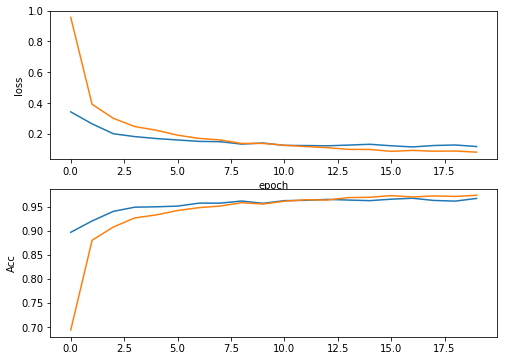

In [85]:
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.plot(val_loss_history)
plt.plot(tra_loss_history)

plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(212)
plt.plot(val_acc_history)
plt.plot(tra_acc_history)

plt.ylabel("Acc")

#plt.legend()
plt.show()

# TensorFlow Custom Experiment

In [0]:
import tensorflow as tf
import numpy as np
import os

In [0]:
tf.enable_eager_execution()

## Load Data

In [0]:
dataset_url = "https://download.mlcc.google.com/mledu-datasets/mnist_train_small.csv"
dataset_file = tf.keras.utils.get_file(fname=os.path.basename(dataset_url),origin=dataset_url)

36528128/36523880 [==============================] - 1s 0us/step


In [0]:
dataset_file

'/root/.keras/datasets/mnist_train_small.csv'

In [0]:
!head -n5 {dataset_file}

6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,67,67,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,252,252,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,250,232,30,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,222,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,147,252,183,5,0,0,0,0,0,0,0,20,89,89,73,0,0,0,0,0,0,0,0,0,0,0,0,48,247,252,159,0,0,0,0,0,0,0,79,236,252,252,249,198,16,0,0,0,0,0,0,0,0,0,41,193,252,199,22,0,0,0,0,0,12,135,248,252,252,252,252,252,100,0,0,0,0,0,0,0,0,0,100,252,252,88,0,0,0,0,0,11,171,252,252,235,175,178,252,252,224,0,0,0,0,0,0,0,0,15,209,252,233,12,0,0,0,0,49,177,252,252,89,26,0,2,166,252,252,0,0,0,0,0,0,0,0,96,253,253,59,0,0,0,0,11,177,255,253,92,0,0,0,0,155,253,128,0,0,0,0,0,0,0,0,143,252,252,10,0,0,0,12,171,252,216,110,13,0,0,0,3,180,

In [0]:
column_names = list(range(785))
feature_names = column_names[1:]
label_name = 0

In [0]:
batch_size = 64

training_dataset = tf.data.experimental.make_csv_dataset(dataset_file,batch_size,
                                                    column_names = column_names,
                                                    label_name = label_name,
                                                    shuffle_seed = 42,
                                                   num_epochs=1)

In [0]:
features, labels = next(iter(training_dataset))
features[1], 

Instructions for updating:
Colocations handled automatically by placer.


(<tf.Tensor: id=2410, shape=(64,), dtype=int32, numpy=
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32)>,)

In [0]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.cast(tf.stack(list(features.values()), axis=1),dtype=tf.float32)
  return features, labels

In [0]:
training_dataset = training_dataset.map(pack_features_vector)

In [0]:
#
features, labels = next(iter(training_dataset))
print(features)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32)


##Model: Architecture, loss and gradient descent

In [0]:
# This returns a tensor
inputs = tf.keras.layers.Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = tf.keras.layers.Dense(128, activation='relu',)(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

#my_model = tf.keras.models.Model(inputs=inputs, outputs= predictions)
model = tf.keras.models.Model(inputs=inputs, outputs= predictions)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 130,058
Trainable params: 130,058
Non-trainable params: 0
_________________________________________________________________


In [0]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=4175, shape=(5, 10), dtype=float32, numpy=
array([[1.0000000e+00, 0.0000000e+00, 6.5809958e-37, 0.0000000e+00,
        3.0715901e-24, 3.1713464e-29, 2.9846028e-32, 0.0000000e+00,
        3.5825859e-30, 0.0000000e+00],
       [1.1364060e-11, 0.0000000e+00, 8.4719689e-18, 7.3227194e-23,
        1.5803199e-28, 2.0987479e-22, 4.5576949e-19, 0.0000000e+00,
        1.0000000e+00, 2.6102458e-33],
       [5.5950814e-01, 0.0000000e+00, 5.7661250e-25, 0.0000000e+00,
        6.6369250e-24, 5.3820564e-29, 5.1267076e-14, 0.0000000e+00,
        4.4049183e-01, 6.8030595e-23],
       [9.9999011e-01, 0.0000000e+00, 2.8764610e-10, 8.4874515e-24,
        7.3985780e-06, 2.2248410e-20, 7.0400532e-08, 0.0000000e+00,
        2.4233834e-06, 4.1305686e-18],
       [1.0000000e+00, 0.0000000e+00, 2.5315462e-13, 0.0000000e+00,
        0.0000000e+00, 6.9953462e-35, 5.1405756e-15, 0.0000000e+00,
        1.0434267e-09, 0.0000000e+00]], dtype=float32)>

In [0]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=4181, shape=(5, 10), dtype=float32, numpy=
array([[0.23196931, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.23196931, 0.08533674],
       [0.15480563, 0.08846988, 0.08846988, 0.08846988, 0.08846988,
        0.08846988, 0.08846988, 0.08846988, 0.1374354 , 0.08846988],
       [0.23196736, 0.08533687, 0.08533687, 0.08533687, 0.0853375 ,
        0.08533687, 0.08533688, 0.08533687, 0.08533709, 0.08533687],
       [0.23196931, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674]],
      dtype=float32)>

In [0]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 8 0 0 0 8 8 8 0 8 8 8 8 8 0 8 0 0 8 8 0 8 0 0 8 0 8 8 0 8 8 0 0 0 8 8 0
 6 0 0 6 0 6 8 0 8 0 8 8 8 2 0 0 8 0 6 0 8 0 8 0 8 8 2]
    Labels: [5 5 0 5 4 7 2 3 3 5 1 3 5 3 5 5 1 9 2 1 5 8 4 1 1 4 3 3 7 5 4 9 4 7 0 8 1
 5 4 7 0 0 0 8 1 1 4 2 4 2 0 7 7 5 5 6 7 3 6 8 2 3 3 3]


In [0]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Instructions for updating:
Use tf.cast instead.
Loss test: 2.357140302658081


In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

global_step = tf.Variable(0)

In [0]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 2.357140302658081
Step: 1,         Loss: 2.3674001693725586


In [0]:
from time import time

In [0]:
## Note: Rerunning this cell uses the same model variables

from tensorflow import contrib
tfe = contrib.eager

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 10

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()
  starttime=time()
  
  # Training loop - using batches of 32
  for x, y in training_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step)

    # Track progress
    epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
  time_taken = time()-starttime
  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 1 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}, time: {}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result(),time_taken ))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Epoch 000: Loss: 2.363, Accuracy: 9.810%, time: 13.667140245437622
Epoch 001: Loss: 2.363, Accuracy: 9.810%, time: 13.47936463356018
Epoch 002: Loss: 2.363, Accuracy: 9.810%, time: 13.571603536605835
Epoch 003: Loss: 2.363, Accuracy: 9.810%, time: 13.663497686386108


KeyboardInterrupt: ignored